<a href="https://colab.research.google.com/github/LukasBeckers/Transformer_Image_Completion/blob/main/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ImageNet-R**

The imagenet_r dataset is a subset of the ImageNet dataset. It is comprised of 30000 vastly different images. As with the ImageNet, each image in the ImageNet-R dataset is assigned to one of 1000 labels. The ImageNet-R was created by collecting Images, that the ResNet-50 model misslabeled. 

In this notebook i will download the imagenet_r dataset from tensorflow. Then i will separately save each image with it's label in the file name.

## Why is this step needed?
The dataset contains images of various different shapes and sizes. To limit the required computational costs, that are needed to train this model, the images will be (on average) sampled to a lower and uniform resolution.



In [1]:
# Imports

from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle as pk
import numpy as np
import shutil
import random
import time
import cv2
import os

In [ ]:
# Checking the current directory.

!pwd

/content


In [3]:
# Connecting the notebook to your google-drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Changing to the directory in which the dataset should be saved.

%cd /content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion

/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion


In [ ]:
# Loading the Imagenet_r dataset.

# Don't run this cell on your own device, or the dataset will be downloaded to 
# your own drive.

imagenet_r = tfds.load('imagenet_r', split='test')

print(f'Number of images in the ImageNet-R dataset: {len(imagenet_r)}')

Number of images in the ImageNet-R dataset: 30000


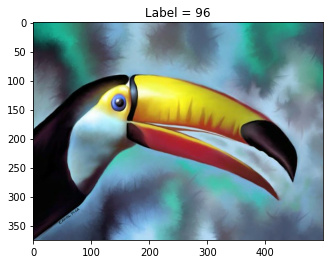

In [ ]:
# Loading a test-image to show all transformations done to the samples.

for test_sample in imagenet_r:
  break

test_image = test_sample['image']
test_label = test_sample['label']

# Showing the test_image and the test_label.
plt.imshow(test_image)
plt.title(f'Label = {test_label}')
plt.show()

In [14]:

# Creating new folders in which the dataset wil be saved.
!mkdir '/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/imagenet_r'
ds_dir = '/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/imagenet_r'

mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/split_imagenet_r’: File exists


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/imagenet_r'

In [ ]:
!pwd
%pwd


/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion


'/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion'

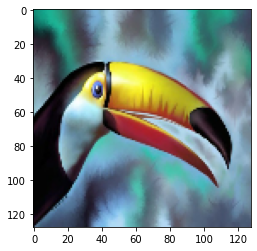

In [ ]:
# The images in the new dataset will be reshaped to 128 x 128 pixles (may be adjusted later).

for i, sample in enumerate(imagenet_r):
  full_image = sample['image']
  label = sample['label']
  break
resized_image = cv2.resize(np.array(full_image), [128, 128])
plt.imshow(resized_image)
plt.show()

In [ ]:
"""
Saving all samples from the ImageNet-R dataset.
All samples will be reshaped to a uniform shape, the lable of the image will be
added to the name of the file.
"""

len_of_ds = len(imagenet_r)
resize_dimensions = [128, 128]

for i, sample in enumerate(imagenet_r):
  full_image = sample['image']
  label = sample['label']
  # Reshaping the image.
  resized_image = cv2.resize(np.array(full_image), resize_dimensions)
  # Creating a file-name for the resized_image.
  # The file-name will contain the label in an easyly extractable form. 
  # File-name template = 'i_label'
  name = f'{i}_{label}'

  # Saving the image.
  cv2.imwrite(f'{ds_dir}/{name}.jpeg', np.array(resized_image))


In [ ]:
"""
To load each sample from the drive for each training-step turns out to be to slow,
for this reason the dataset is ziped.
The zip-file is loaded to the 'Transformer-Model' colab notebook each 
time the notebook-runtime is started.
"""

shutil.make_archive(ds_dir, 'zip', ds_dir)